## Problem Statement
The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on
the Zomato Dataset and build an appropriate Machine Learning Model that will help
various Zomato Restaurants to predict their respective Ratings based on certain
features.

## Approach: 
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. Try out different machine
learning algorithms that’s best fit for the above case.

## Results: 
You have to build a solution that should able to predict the ratings of the
restaurants listed in the dataset.

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Gathering  

In [2]:
#load the dataset
df = pd.read_csv('zomato.csv')

#### create a shallow copy of a dataframe

In [3]:
dfCopy = df.copy()


#### Columns description
url contains the url of the restaurant in the zomato website

address contains the address of the restaurant in Bengaluru

name contains the name of the restaurant

online_order whether online ordering is available in the restaurant or not

book_table table book option available or not

rate contains the overall rating of the restaurant out of 5

votes contains total number of rating for the restaurant as of the above mentioned date

phone contains the phone number of the restaurant

location contains the neighborhood in which the restaurant is located

rest_type restaurant type

dish_liked dishes people liked in the restaurant

cuisines food styles, separated by comma

approx_cost(for two people) contains the approximate cost for meal for two people

reviews_list list of tuples containing reviews for the restaurant, each tuple

menu_item contains list of menus available in the restaurant

listed_in(type) type of meal

listed_in(city) contains the neighborhood in which the restaurant is listed

In [4]:
df.shape

(51717, 17)

In [5]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
#checking duplicate value
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Only Vote column is neumeric rest all dependent categorical features we need to convert to neumeric

### Irrelavant Data
Dropping the unnecessary columns

In [9]:
df.drop(columns =['dish_liked' ],axis=1, inplace = True)
df.drop(columns =['url' ],axis=1, inplace = True)
df.drop(columns =['phone' ],axis=1, inplace = True)
df.drop(columns =['reviews_list' ],axis=1, inplace = True)

Rename the columns 

In [10]:
df.rename(columns={"listed_in(city)":"city"}, inplace = True)
df.rename(columns={"approx_cost(for two people)":"cost"}, inplace = True)
df.rename(columns={"listed_in(type)":"type"}, inplace = True)

In [11]:
df.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [12]:
# Find out the types of all columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       51717 non-null  object
 1   name          51717 non-null  object
 2   online_order  51717 non-null  object
 3   book_table    51717 non-null  object
 4   rate          43942 non-null  object
 5   votes         51717 non-null  int64 
 6   location      51696 non-null  object
 7   rest_type     51490 non-null  object
 8   cuisines      51672 non-null  object
 9   cost          51371 non-null  object
 10  menu_item     51717 non-null  object
 11  type          51717 non-null  object
 12  city          51717 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.5+ MB


In [13]:
df.columns[df.isnull().any()].tolist() #df.isna().any()

['rate', 'location', 'rest_type', 'cuisines', 'cost']

In [14]:
# dropping the null value from the dataset
df.dropna(how='any',inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       43533 non-null  object
 1   name          43533 non-null  object
 2   online_order  43533 non-null  object
 3   book_table    43533 non-null  object
 4   rate          43533 non-null  object
 5   votes         43533 non-null  int64 
 6   location      43533 non-null  object
 7   rest_type     43533 non-null  object
 8   cuisines      43533 non-null  object
 9   cost          43533 non-null  object
 10  menu_item     43533 non-null  object
 11  type          43533 non-null  object
 12  city          43533 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.6+ MB


### Data Cleaning

Removing nan values and replacing data which is not in correct format.

Rate column should be in proper format

In [16]:
# new data frame with split value columns
new = df["rate"].str.split("/", n = 1, expand = True)
  
df["rating"]= new[0]
  
# Dropping old columns
df.drop(columns =["rate"], inplace = True)
  

In [17]:
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

Replace non neumeric data to 0

In [18]:
#df["rating"] = df["rating"].fillna('0')
#df["rating"].replace("-", "0",inplace = True)
#df["rating"].replace("NEW", "0", inplace = True)

In [19]:
df.dropna(axis='index',subset=['rating'],inplace=True)
df["rating"].replace("-", "0",inplace = True)
df["rating"].replace("NEW", "0", inplace = True)

In [20]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [21]:
df["rating"].replace(0,df["rating"].mean(),inplace = True)

In [22]:
df['rating'].unique()

array([4.1      , 3.8      , 3.7      , 3.6      , 4.6      , 4.       ,
       4.2      , 3.9      , 3.1      , 3.       , 3.2      , 3.3      ,
       2.8      , 4.4      , 4.3      , 3.5089725, 2.9      , 3.5      ,
       2.6      , 3.4      , 4.5      , 2.5      , 2.7      , 4.7      ,
       2.4      , 2.2      , 2.3      , 4.8      , 4.9      , 2.1      ,
       2.       , 1.8      ])

In [23]:
df.isna().sum()

address         0
name            0
online_order    0
book_table      0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
menu_item       0
type            0
city            0
rating          0
dtype: int64

In [24]:
df["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [25]:
df["cost"] = df["cost"].fillna('0')

In [26]:
df["cost"]= pd.to_numeric(df["cost"], errors='coerce')

In [27]:
df["cost"].replace(0,df["cost"].mean(),inplace = True)

Create a copy of a dataframe before converting into numeric data

In [28]:
zomato_df = df.copy()

In [29]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode label columns.
df["name"]= label_encoder.fit_transform(df["name"])
df["online_order"]= label_encoder.fit_transform(df["online_order"]) #df['online_order']=df['online_order'].map({'Yes': '1', 'No':'0'})  # mapping method cat to num
df["book_table"]= label_encoder.fit_transform(df["book_table"])
df["type"]= label_encoder.fit_transform(df["type"])
df["city"]= label_encoder.fit_transform(df["city"])

In [30]:
df["location"]= label_encoder.fit_transform(df["location"].astype(str))
df["rest_type"]= label_encoder.fit_transform(df["rest_type"].astype(str))
df["address"]= label_encoder.fit_transform(df["address"].astype(str))
df["menu_item"]= label_encoder.fit_transform(df["menu_item"].astype(str))
df["cuisines"]= label_encoder.fit_transform(df["cuisines"].astype(str))


In [31]:
df.head()

,address,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item,type,city,rating
0,6704,3009,1,1,775,1,24,1986,800.0,8559,0,1,4.1
1,3214,5681,1,0,787,1,24,859,800.0,8559,0,1,4.1
2,646,5267,1,0,918,1,19,688,800.0,8559,0,1,3.8
3,2101,149,0,0,88,1,73,2335,300.0,8559,0,1,3.7
4,287,2423,0,0,166,4,24,2015,600.0,8559,0,1,3.8


In [32]:
df.dtypes

address           int32
name              int32
online_order      int32
book_table        int32
votes             int64
location          int32
rest_type         int32
cuisines          int32
cost            float64
menu_item         int32
type              int32
city              int32
rating          float64
dtype: object

## Data Visualization

<AxesSubplot:>

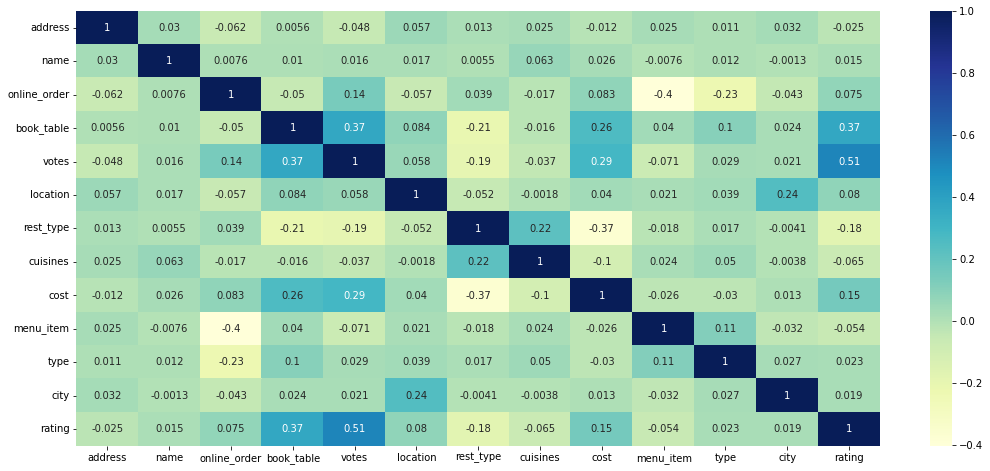

In [33]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(18,8))
sns.heatmap(corr, annot=True,cmap="YlGnBu")

Insights: Votes and rating are highly correlated. Followed by booktable and votes.

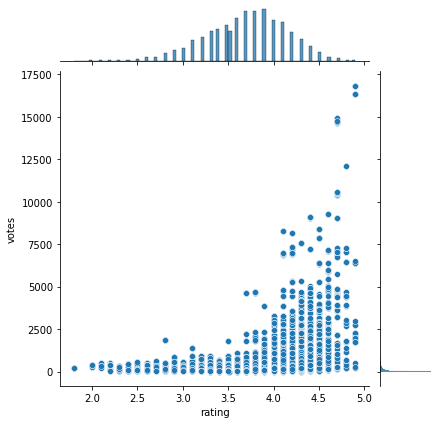

In [34]:
sns.jointplot(x='rating',y='votes',data=zomato_df)

Assumption: Most of people have voted for rating 3 to 5 .

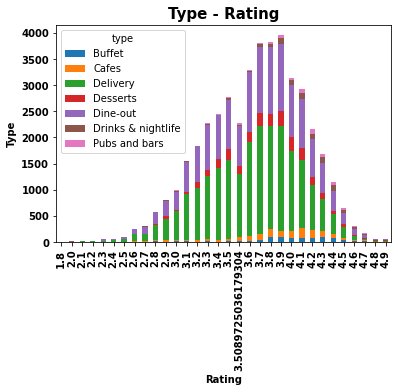

In [35]:
type_plt=pd.crosstab(zomato_df['rating'],zomato_df['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'Restaurants delivering online or not')

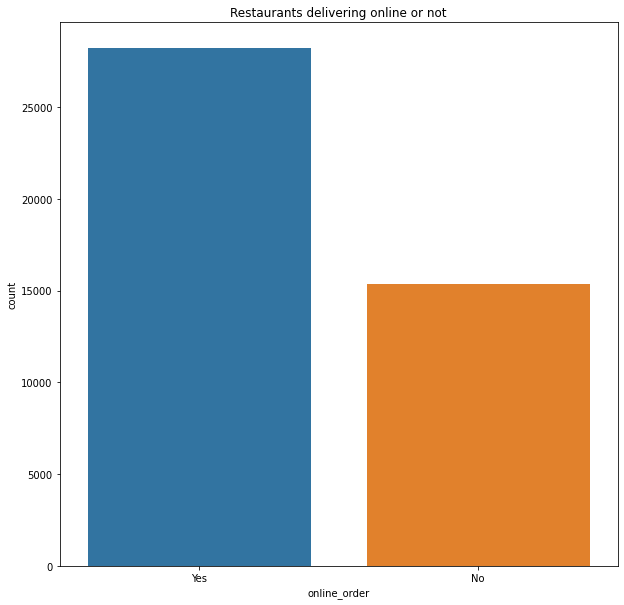

In [36]:
sns.countplot(zomato_df['online_order'])
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or not')

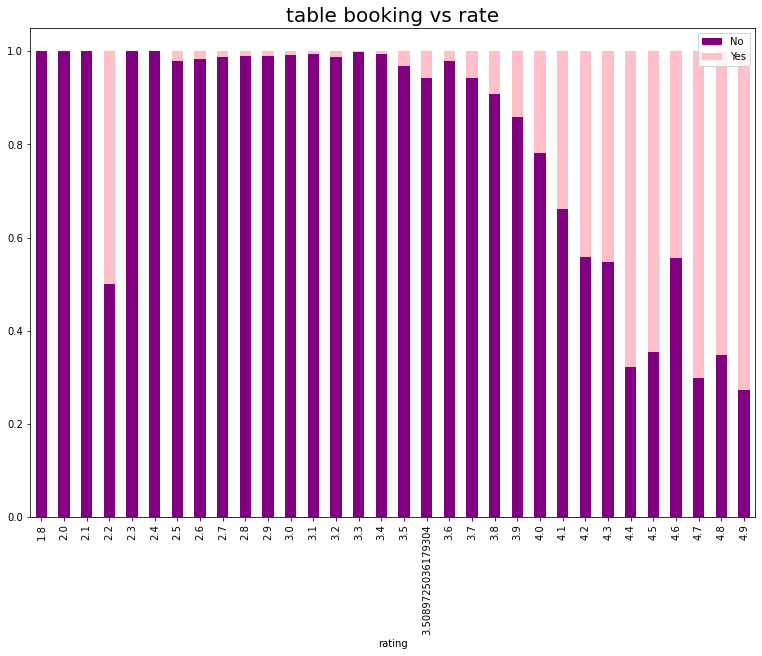

In [37]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato_df['rating'], zomato_df['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['Purple','pink'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Type of Service')

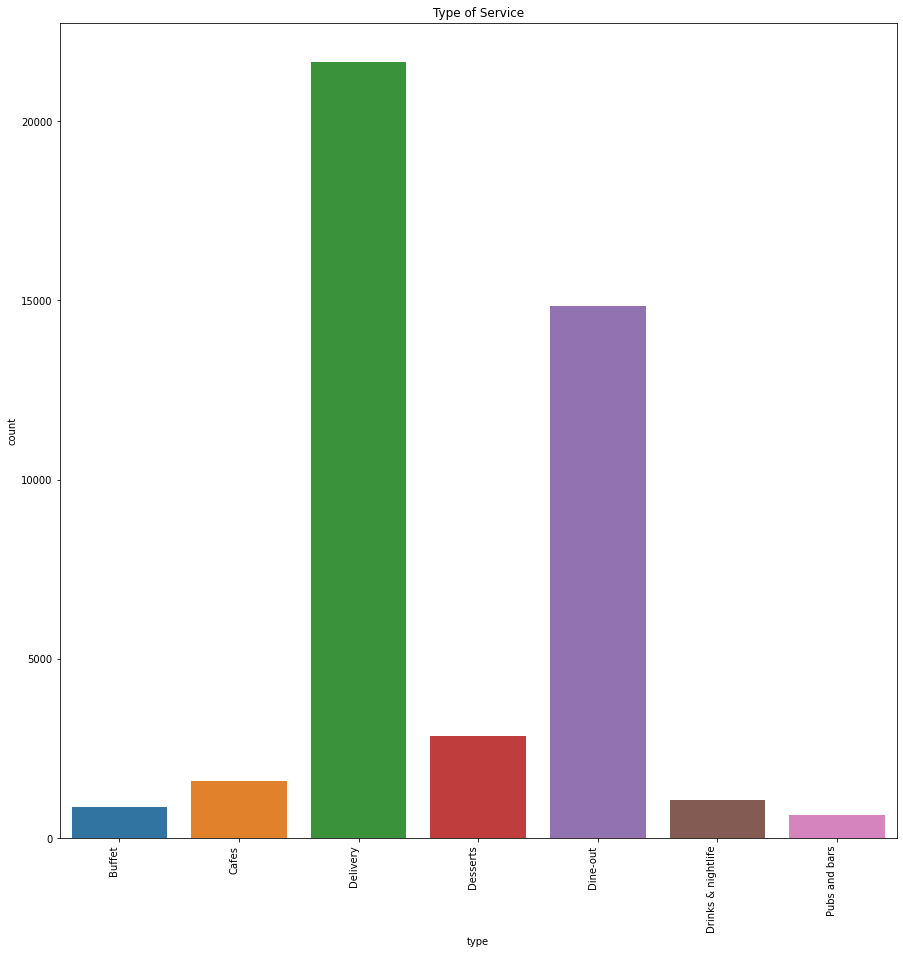

In [38]:
sns.countplot(zomato_df['type'])
sns.countplot(zomato_df['type']).set_xticklabels(sns.countplot(zomato_df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

Text(0.5, 1.0, 'Location wise count for restaurants')

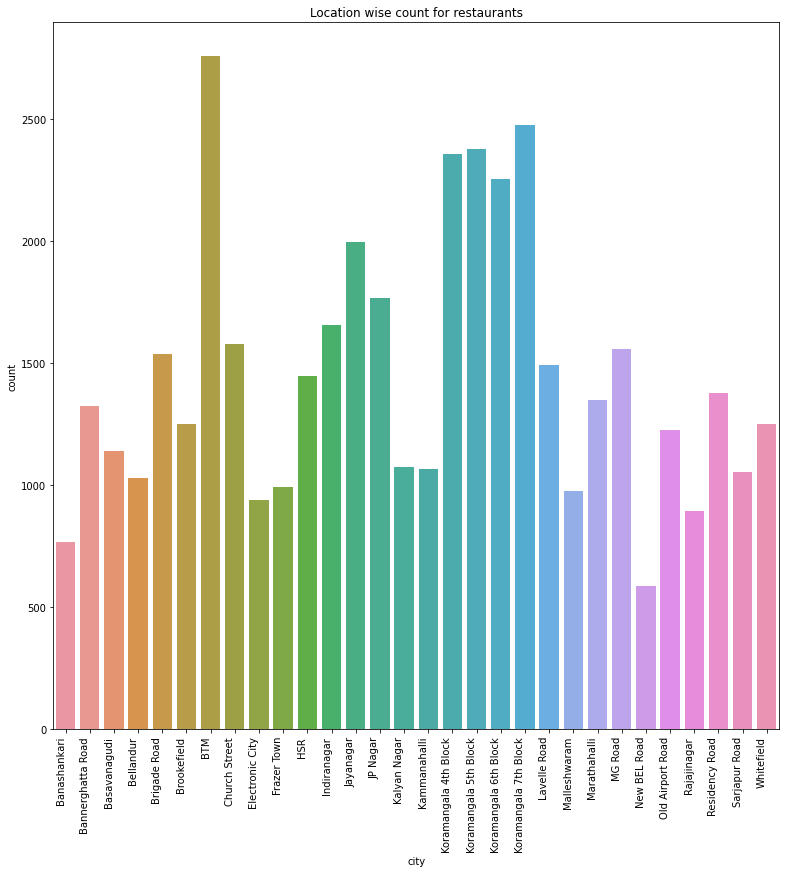

In [39]:
sns.countplot(zomato_df['city'])
sns.countplot(zomato_df['city']).set_xticklabels(sns.countplot(zomato_df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

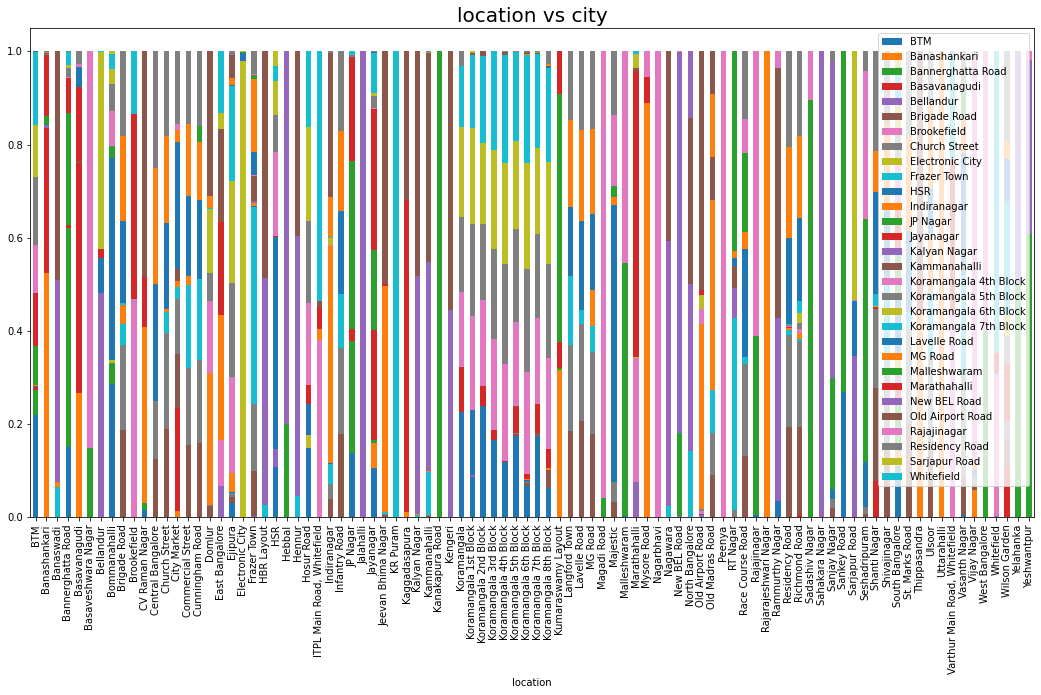

In [40]:
plt.rcParams['figure.figsize'] = (18, 9)
Y = pd.crosstab(zomato_df['location'], zomato_df['city'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.title('location vs city', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Lets perform train test split on dataset 

In [41]:
df.isnull().any()

address         False
name            False
online_order    False
book_table      False
votes           False
location        False
rest_type       False
cuisines        False
cost             True
menu_item       False
type            False
city            False
rating          False
dtype: bool

In [42]:
df["cost"].unique()

array([800., 300., 600., 700., 550., 500., 450., 650., 400., 900., 200.,
       750., 150., 850., 100.,  nan, 350., 250., 950., 199.,  80., 160.,
       230., 130., 180., 330.,  50.,  40.,  70., 560., 240., 360., 120.])

In [43]:
df["cost"] = df["cost"].fillna(0)

In [44]:
X = df.iloc[:,[2,3,4,5,6,7,8,9,10]]
X

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item,type
0,1,1,775,1,24,1986,800.0,8559,0
1,1,0,787,1,24,859,800.0,8559,0
2,1,0,918,1,19,688,800.0,8559,0
3,0,0,88,1,73,2335,300.0,8559,0
4,0,0,166,4,24,2015,600.0,8559,0
...,...,...,...,...,...,...,...,...,...
51709,0,0,34,88,25,1873,800.0,8559,6
51711,0,0,81,88,25,104,800.0,8559,6
51712,0,0,27,88,6,911,0.0,8559,6
51715,0,1,236,26,6,1268,0.0,8559,6


In [45]:
y = df.loc[:, df.columns == 'rating']
y

,rating
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
51709,3.7
51711,2.5
51712,3.6
51715,4.3


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [47]:
from sklearn import metrics

In [48]:
# linear Regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)

from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.2906474105680876
MAE: 0.280791449980336
MSE: 0.1326841378048695
RMSE: 0.36425833937587415


In [49]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

DTree.fit(X_train,y_train)
y_predict=DTree.predict(X_test)

from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,y_predict))
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

R square: 0.818834658437188
MAE: 0.08740087039848651
MSE: 0.0338869097026024
RMSE: 0.18408397459475498


In [50]:
#Preparing Random Forest Re gression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)

RForest.fit(X_train,y_train)
predict=RForest.predict(X_test)

from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,predict))
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

R square: 0.8682166950414882
MAE: 0.0882699197118788
MSE: 0.024650018137665073
RMSE: 0.15700324244315808


In [51]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_prediction =ETree.predict(X_test)


from sklearn.metrics import r2_score
print('R square:',r2_score(y_test,y_prediction))
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

R square: 0.9288636175168289
MAE: 0.045466832666289134
MSE: 0.013306033863774264
RMSE: 0.11535178309750684


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_pred =gbr.predict(X_test)

print('R square',r2_score(y_test,y_pred))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square 0.5182046133505629
MAE: 0.21052811119022868
MSE: 0.09011964772996763
RMSE: 0.30019934665146697


In [53]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)
y_predicts=xgb.predict(X_test)

print('R square:', r2_score(y_test,y_predict))
print('MAE:', metrics.mean_absolute_error(y_test, y_predicts))
print('MSE:', metrics.mean_squared_error(y_test, y_predicts))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicts)))

[17:01:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R square: 0.818834658437188
MAE: 0.14539706542971428
MSE: 0.04457991529279658
RMSE: 0.21113956354221391


Extra tree regression gives us the best r2 value with minimum errors

In [54]:
import pickle
# open a file, where you ant to store the data
file = open('extra_tree_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(y_prediction, file)